In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

from linear_models import LinearClassifier
from linear_models import SoftmaxRegression
from multiclass import OVR, OVO
from utils import binary, standardize, ordinal
from utils import scatter_plot, plot_decision_regions

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
%matplotlib inline

In [2]:
iris = pd.read_csv("../datasets/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


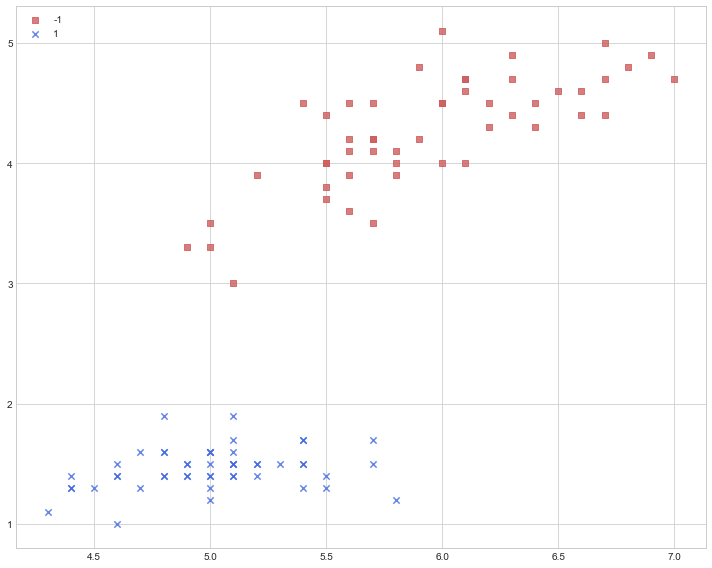

In [3]:
X = iris.iloc[:100, [0, 2]].values
y = iris.iloc[:100, -1].values

# X = standardize(X)
y = binary(y)
fig = plt.figure(figsize=(10,8))
ax = scatter_plot(X, y, legend = 2)

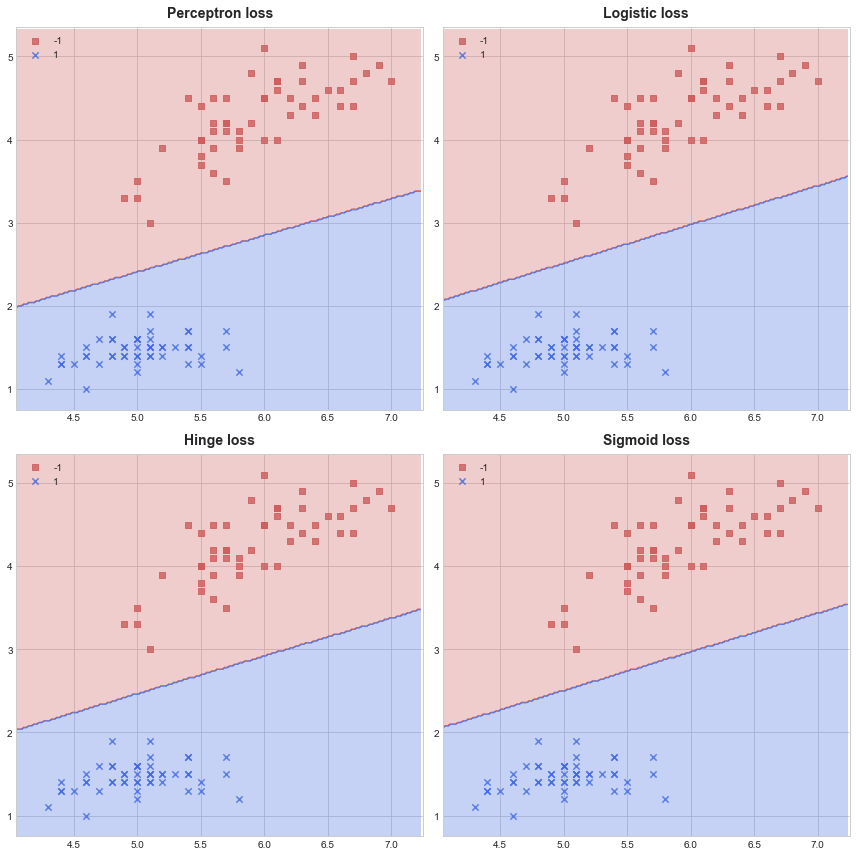

In [4]:
names = [
    "Perceptron loss",
    "Logistic loss",
    "Hinge loss",
    "Sigmoid loss"
]

classifiers = [
    LinearClassifier("perceptron", "gd", epochs=1000, eta=0.2),
    LinearClassifier("logistic", "gd", epochs=1000, eta=1),
    LinearClassifier("hinge", "gd", epochs=1000, eta=0.2),
    LinearClassifier("sigmoid", "gd", epochs=1000, eta=1)
]

fig = plt.figure(figsize=(12,12))
gs = plt.GridSpec(2, 2, figure=fig)
for name, clf, idx in zip(names, classifiers, product([0, 1], [0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[idx[0], idx[1]])
    ax = plot_decision_regions(X=X, y=y, classifier=clf, legend=2)
    plt.title(name)

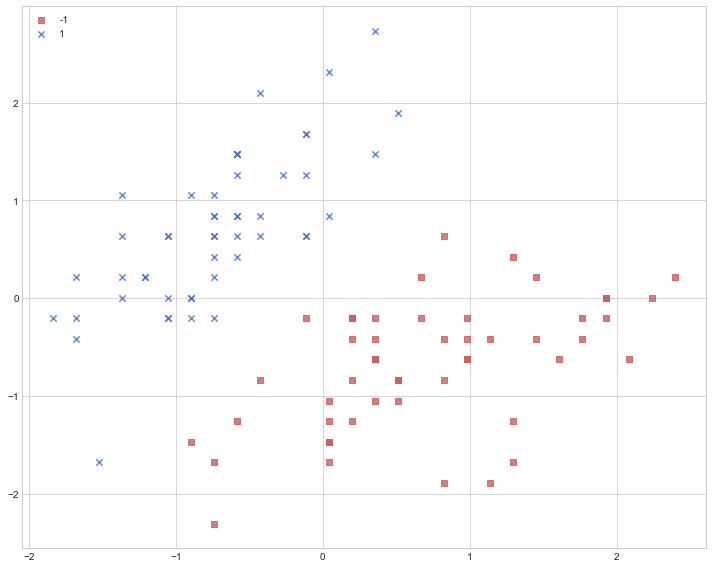

In [5]:
X = iris.iloc[:100, [0, 1]].values
y = iris.iloc[:100, -1].values

X = standardize(X)
y = binary(y)
fig = plt.figure(figsize=(10,8))
ax = scatter_plot(X, y, legend=2)

CPU times: total: 422 ms
Wall time: 410 ms


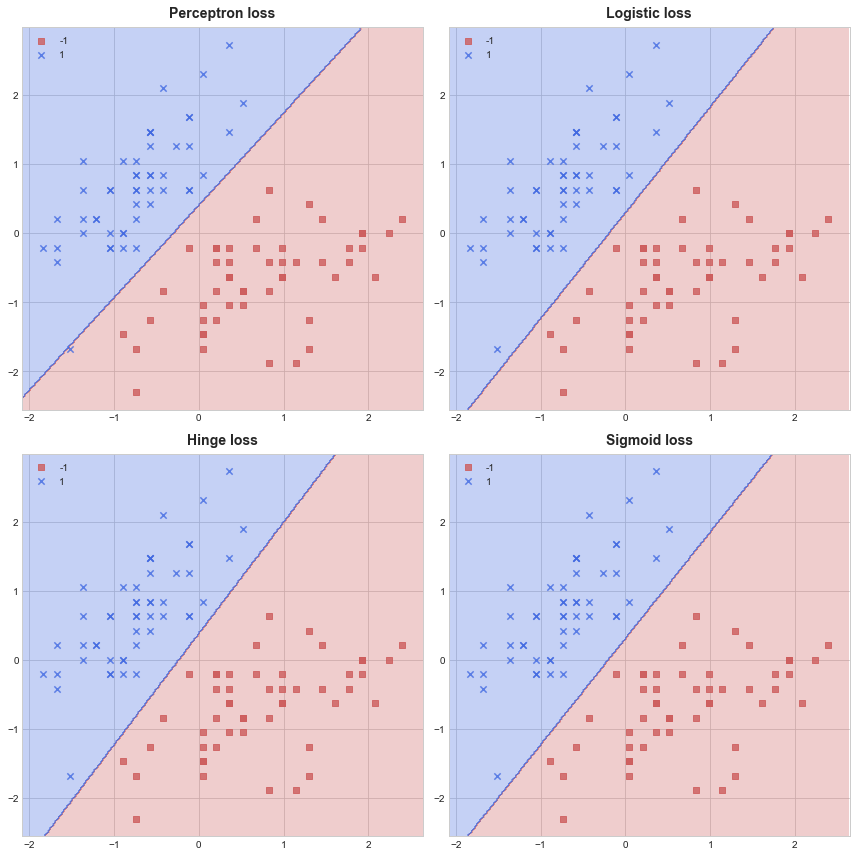

In [6]:
%%time
names = [
    "Perceptron loss",
    "Logistic loss",
    "Hinge loss",
    "Sigmoid loss"
]

classifiers = [
    LinearClassifier("perceptron", "sgd", epochs=100, eta=0.2),
    LinearClassifier("logistic", "sgd", epochs=100, eta=1),
    LinearClassifier("hinge", "sgd", epochs=100, eta=0.2),
    LinearClassifier("sigmoid", "sgd", epochs=100, eta=1)
]

fig = plt.figure(figsize=(12,12))
gs = plt.GridSpec(2, 2, figure=fig)
for name, clf, idx in zip(names, classifiers, product([0, 1], [0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[idx[0], idx[1]])
    ax = plot_decision_regions(X=X, y=y, classifier=clf, legend=2)
    plt.title(name)

CPU times: total: 188 ms
Wall time: 180 ms


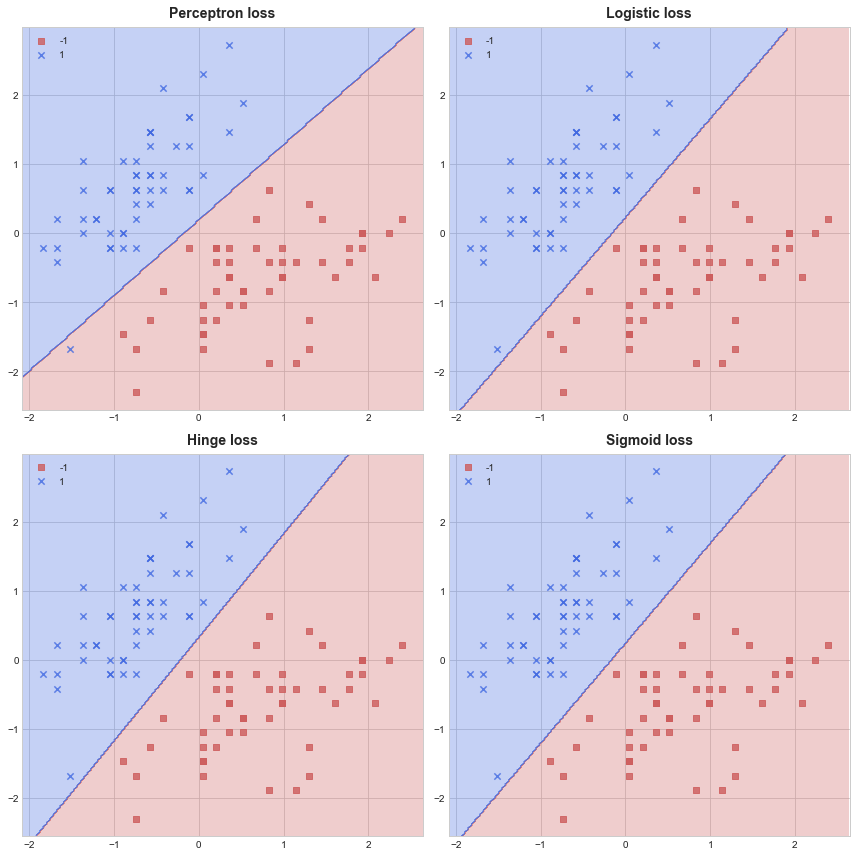

In [7]:
%%time
names = [
    "Perceptron loss",
    "Logistic loss",
    "Hinge loss",
    "Sigmoid loss"
]

classifiers = [
    LinearClassifier("perceptron", "batch_gd", epochs=100, eta=0.2, batch_size=10),
    LinearClassifier("logistic", "batch_gd", epochs=100, eta=1, batch_size=10),
    LinearClassifier("hinge", "batch_gd", epochs=100, eta=0.2, batch_size=10),
    LinearClassifier("sigmoid", "batch_gd", epochs=100, eta=1, batch_size=10)
]

fig = plt.figure(figsize=(12,12))
gs = plt.GridSpec(2, 2, figure=fig)
for name, clf, idx in zip(names, classifiers, product([0, 1], [0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[idx[0], idx[1]])
    ax = plot_decision_regions(X=X, y=y, classifier=clf, legend=2)
    plt.title(name)

CPU times: total: 234 ms
Wall time: 231 ms


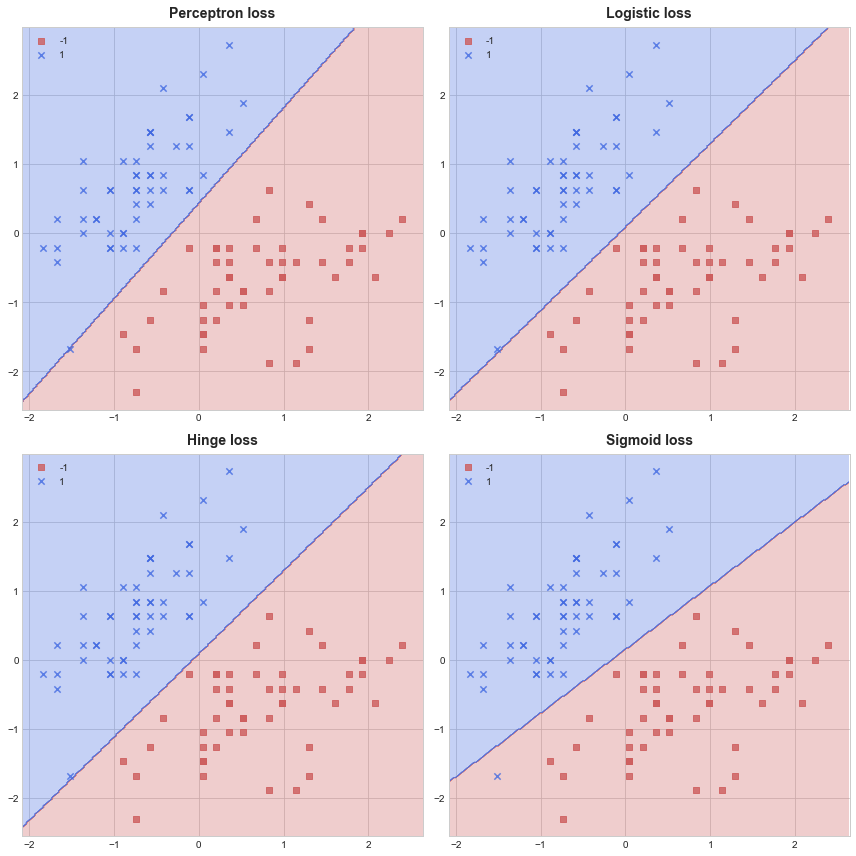

In [8]:
%%time
names = [
    "Perceptron loss",
    "Logistic loss",
    "Hinge loss",
    "Sigmoid loss"
]

classifiers = [
    LinearClassifier("perceptron", "sag", epochs=1000, eta=0.2),
    LinearClassifier("logistic", "sag", epochs=1000, eta=1),
    LinearClassifier("hinge", "sag", epochs=1000, eta=0.2),
    LinearClassifier("sigmoid", "sag", epochs=1000, eta=1)
]

fig = plt.figure(figsize=(12,12))
gs = plt.GridSpec(2, 2, figure=fig)
for name, clf, idx in zip(names, classifiers, product([0, 1], [0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[idx[0], idx[1]])
    ax = plot_decision_regions(X=X, y=y, classifier=clf, legend=2)
    plt.title(name)

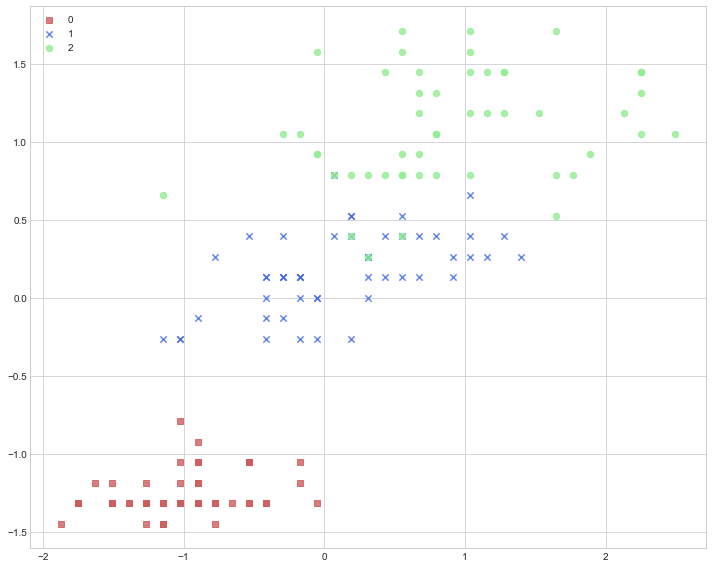

In [9]:
X = iris.iloc[:, [0, 3]].values
y = iris.iloc[:, -1].values

X = standardize(X)
y = ordinal(y)
fig = plt.figure(figsize=(10,8))
ax = scatter_plot(X, y, legend=2)

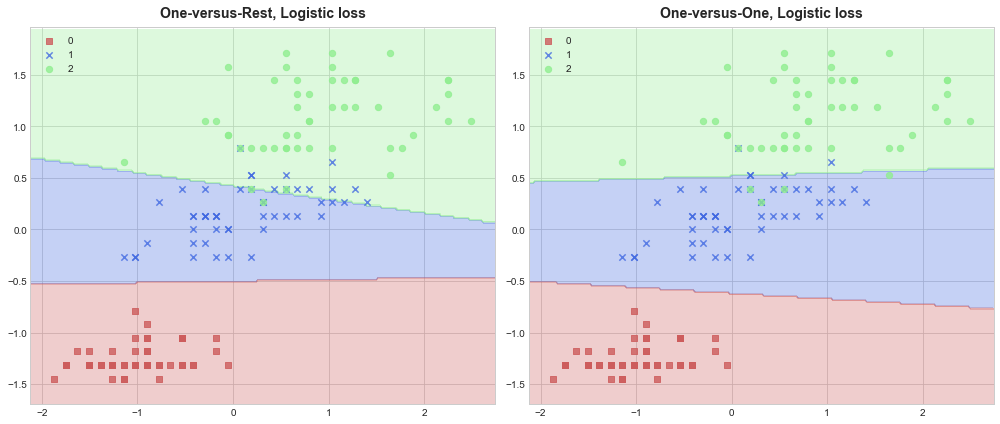

In [10]:
names = [
    "One-versus-Rest, Logistic loss",
    "One-versus-One, Logistic loss"
]

classifiers = [
    OVR(LinearClassifier(loss="logistic", optimizer="sgd", eta=1, epochs=100)),
    OVO(LinearClassifier(loss="logistic", optimizer="sgd", eta=1, epochs=100))
]

fig = plt.figure(figsize=(14,6))
gs = plt.GridSpec(1, 2, figure=fig)
for name, clf, idx in zip(names, classifiers, product([0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[idx[0]])
    ax = plot_decision_regions(X=X, y=y, classifier=clf, legend=2)
    plt.title(name)

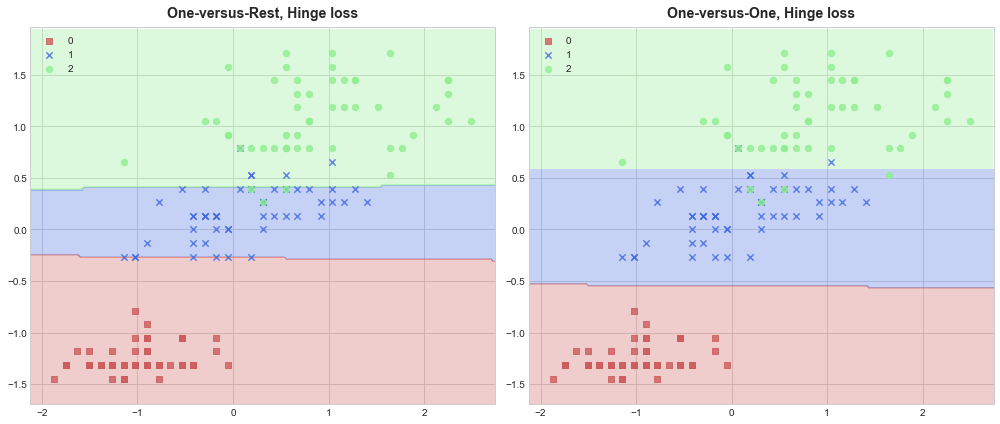

In [11]:
names = [
    "One-versus-Rest, Hinge loss",
    "One-versus-One, Hinge loss"
]

classifiers = [
    OVR(LinearClassifier("hinge", "batch_gd", epochs=150, eta=0.2, batch_size=10)),
    OVO(LinearClassifier("hinge", "batch_gd", epochs=100, eta=0.2, batch_size=10))
]

fig = plt.figure(figsize=(14,6))
gs = plt.GridSpec(1, 2, figure=fig)
for name, clf, idx in zip(names, classifiers, product([0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[idx[0]])
    ax = plot_decision_regions(X=X, y=y, classifier=clf, legend=2)
    plt.title(name)

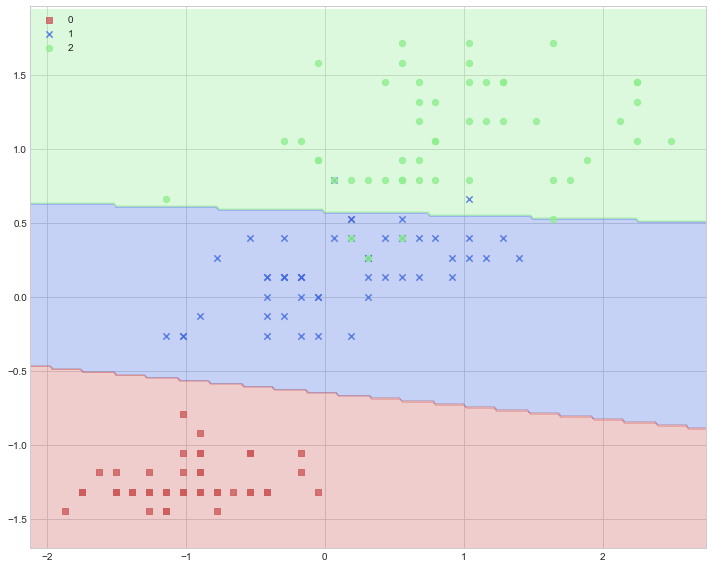

In [12]:
model = SoftmaxRegression(eta=0.1, epochs=400)
model.fit(X, y)

fig = plt.figure(figsize=(10,8))
ax = plot_decision_regions(X, y, model, legend=2)

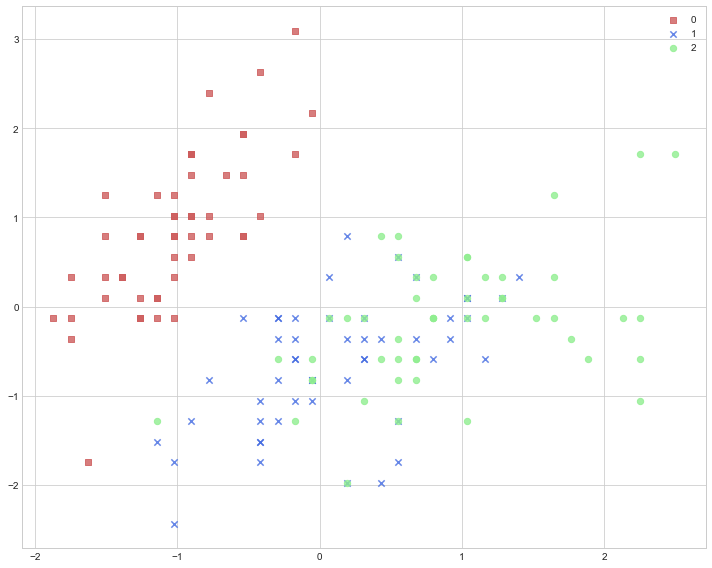

In [13]:
X = iris.iloc[:, [0, 1]].values
y = iris.iloc[:, -1].values

X = standardize(X)
y = ordinal(y)
fig = plt.figure(figsize=(10,8))
ax = scatter_plot(X, y, legend=1)

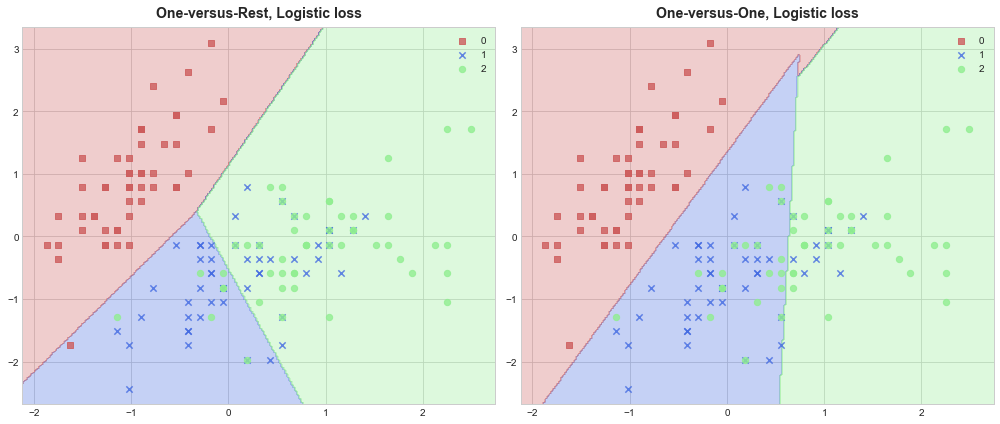

In [14]:
names = [
    "One-versus-Rest, Logistic loss",
    "One-versus-One, Logistic loss"
]

classifiers = [
    OVR(LinearClassifier(loss="logistic", optimizer="sgd", eta=1, epochs=100)),
    OVO(LinearClassifier(loss="logistic", optimizer="sgd", eta=1, epochs=100))
]

fig = plt.figure(figsize=(14,6))
gs = plt.GridSpec(1, 2, figure=fig)
for name, clf, idx in zip(names, classifiers, product([0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[idx[0]])
    ax = plot_decision_regions(X=X, y=y, classifier=clf, legend=1)
    plt.title(name)

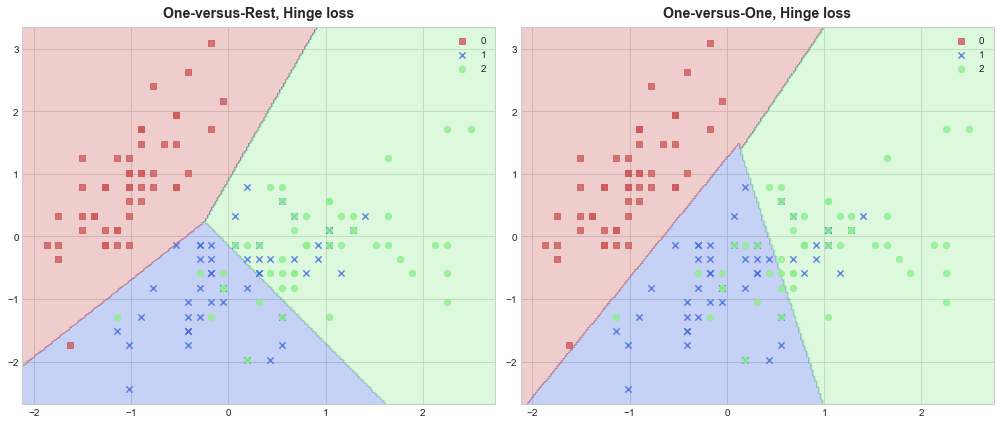

In [15]:
names = [
    "One-versus-Rest, Hinge loss",
    "One-versus-One, Hinge loss"
]

classifiers = [
    OVR(LinearClassifier("hinge", "batch_gd", epochs=150, eta=0.2, batch_size=10)),
    OVO(LinearClassifier("hinge", "batch_gd", epochs=100, eta=0.2, batch_size=10))
]

fig = plt.figure(figsize=(14,6))
gs = plt.GridSpec(1, 2, figure=fig)
for name, clf, idx in zip(names, classifiers, product([0, 1])):
    clf.fit(X, y)
    ax = plt.subplot(gs[idx[0]])
    ax = plot_decision_regions(X=X, y=y, classifier=clf, legend=1)
    plt.title(name)

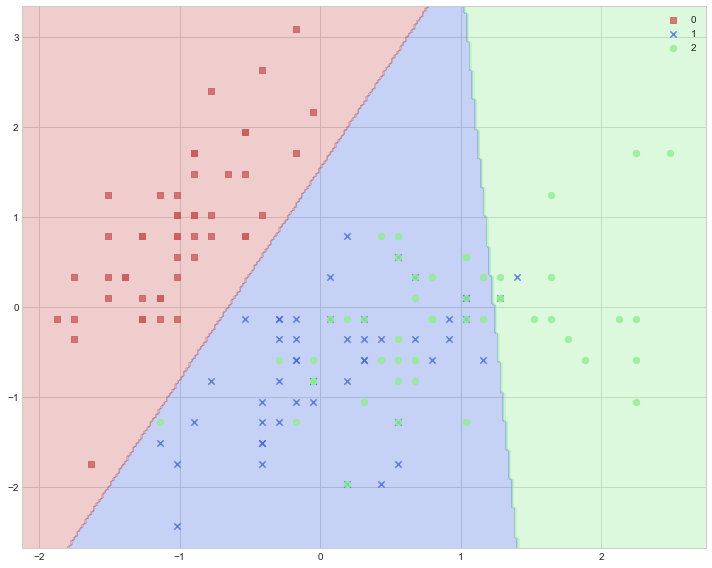

In [16]:
model = SoftmaxRegression(eta=0.1, epochs=400)
model.fit(X, y)

fig = plt.figure(figsize=(10,8))
ax = plot_decision_regions(X, y, model, legend=1)